In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
plt.style.use('default')
pio.renderers.default = 'iframe'
pio.templates.default = 'plotly_white'
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv(r'Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [70]:
pd.set_option('display.float_format',"{:.3f}".format)

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(545, 13)

In [28]:
def distribution(x, transformation):
    if transformation == None or transformation == 0:
        transformed_x = None
    else:
        if str(transformation).find('Transformer') != -1:
            transformed_x = transformation.fit_transform(x.to_numpy().reshape(-1,1))
        elif transformation == np.power:
            transformed_x = np.power(x, float(input('number')))
        else:
            transformed_x = transformation(x)
    if transformed_x is None:
        plt.figure(figsize=(10, 4), dpi = 100)
        sns.kdeplot(x, color='green',fill = True)
        plt.axvline(x.mean(),color = 'black')
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.grid(alpha = 0)
        plt.ylabel('')
        print(x.skew())
    else:
        plt.figure(figsize=(11, 4), dpi = 100)
        plt.subplot(121)
        plt.xticks(rotation=45)
        sns.kdeplot(x, color='crimson',fill = True)
        plt.axvline(x.mean(),color = 'black')
        plt.xlabel('')
        plt.grid(alpha = 0)
        plt.ylabel('')
        plt.subplot(122)
        plt.xticks(rotation=45)
        sns.kdeplot(transformed_x, color='crimson',fill = True) 
        plt.axvline(transformed_x.mean(),color = 'black')
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(alpha = 0)
        plt.legend('')
        print("Pre:", x.skew())
        print("Post:", pd.DataFrame(transformed_x).skew())
    plt.show()


PRICE
Pre: 1.2122388370279802
Post: 0    0.002774
dtype: float64


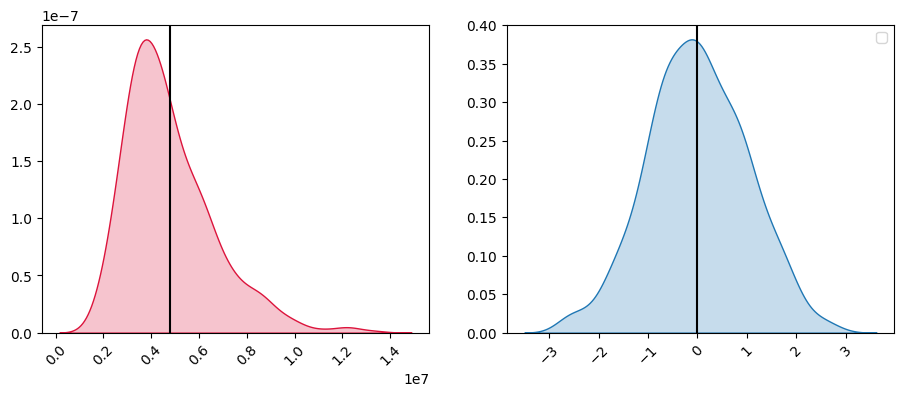

AREA
Pre: 1.321188343153483
Post: 0    0.004175
dtype: float64


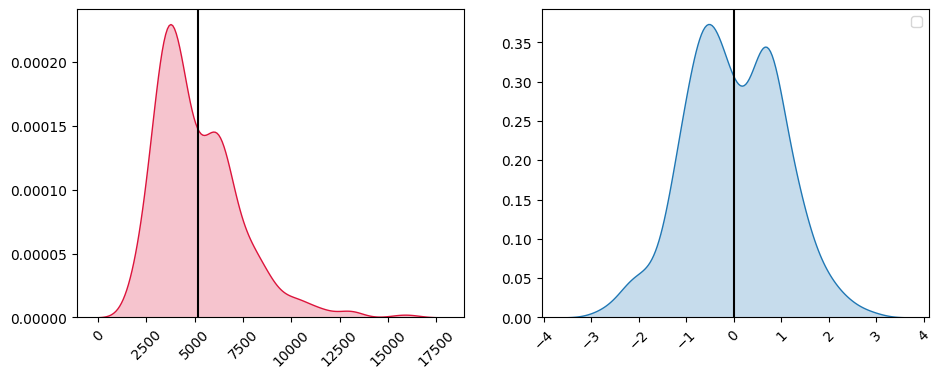

BEDROOMS
Pre: 0.49568394074553473
Post: 0    0.00054
dtype: float64


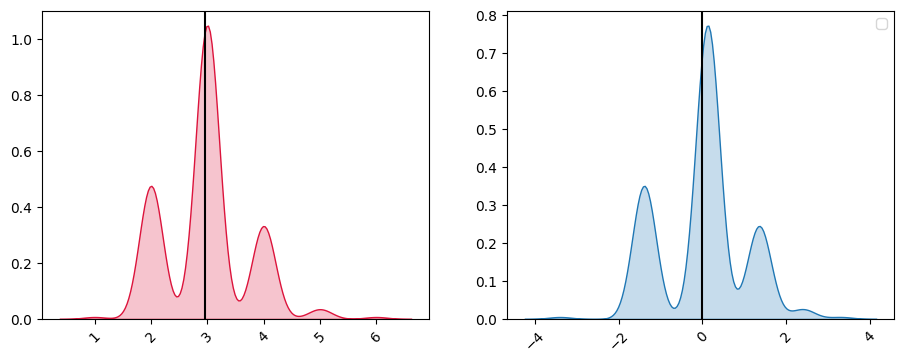

BATHROOMS
Pre: 1.5892635781317528
Post: 0    1.073066
dtype: float64


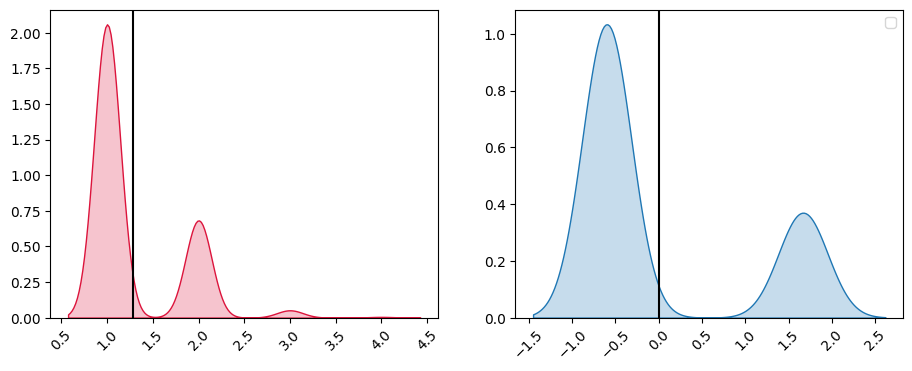

STORIES
Pre: 1.0820882904085742
Post: 0    0.121281
dtype: float64


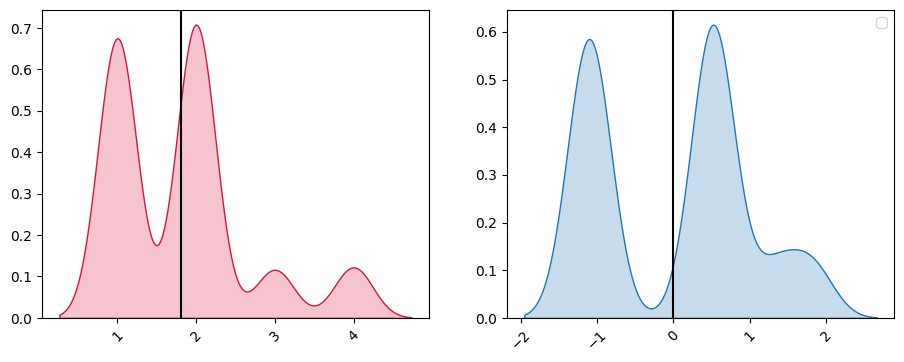

GUESTROOM
Pre: 1.6884185453289648
Post: 0    1.688419
dtype: float64


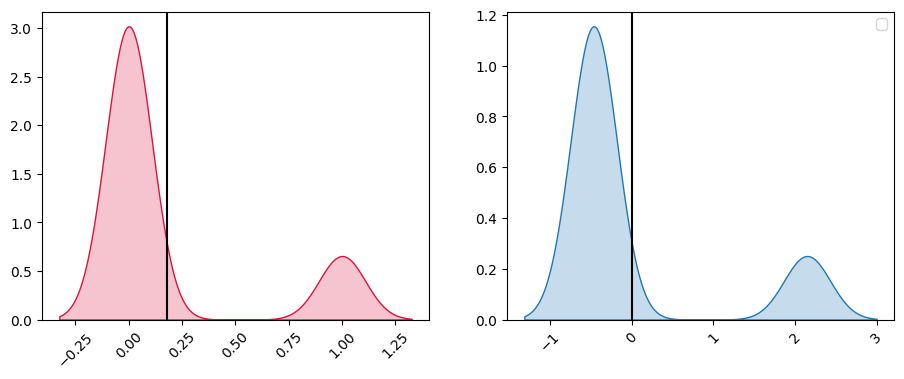

BASEMENT
Pre: 0.6285895563131917
Post: 0    0.62859
dtype: float64


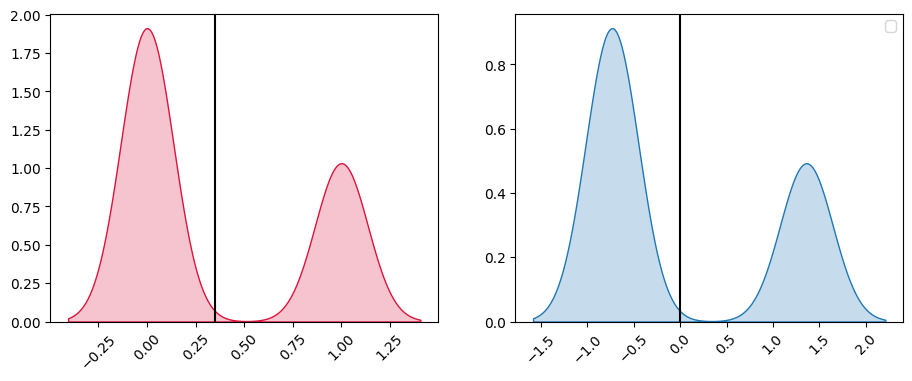

HOTWATERHEATING
Pre: 4.353428280535367
Post: 0    4.353428
dtype: float64


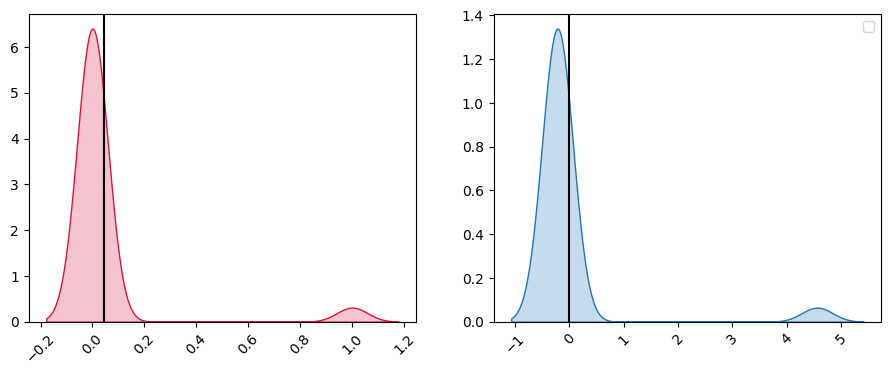

AIRCONDITIONING
Pre: 0.7957475120724435
Post: 0    0.795748
dtype: float64


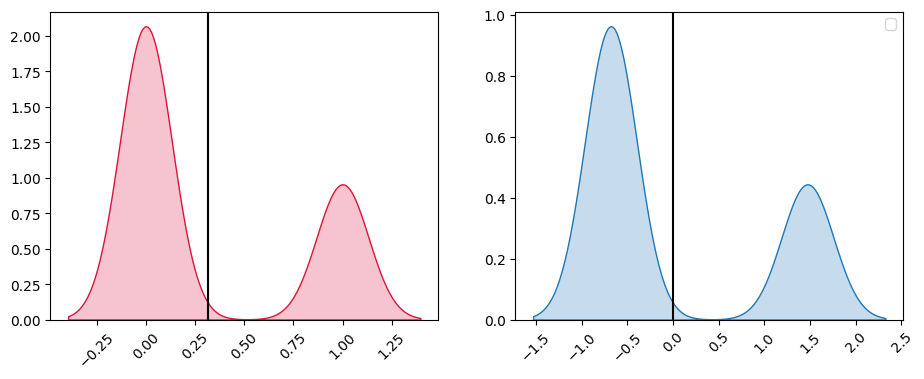

PARKING
Pre: 0.8420623343734072
Post: 0    0.311355
dtype: float64


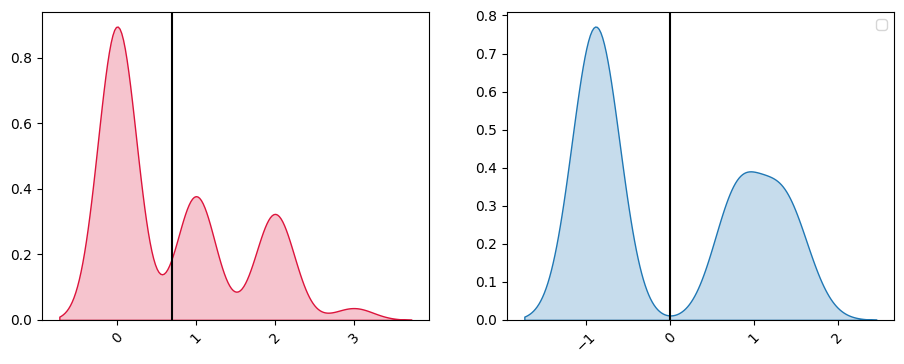

PREFAREA
Pre: 1.2543614597352075
Post: 0    1.254361
dtype: float64


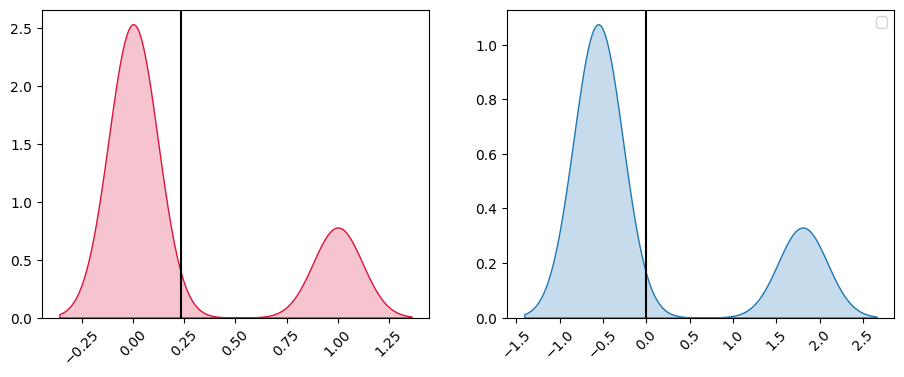

In [39]:
for i in df.select_dtypes('number'):
    print(f'{str(i).upper()}')
    distribution(df[i],PowerTransformer())

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [11]:
def countplots(x):
    sns.countplot(X)
    plt.show()

In [14]:
df[['guestroom','basement','hotwaterheating','airconditioning','prefarea']]=pd.get_dummies(df[['guestroom','basement','hotwaterheating','airconditioning','prefarea']], drop_first=True, dtype=int, sparse=False)

In [15]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

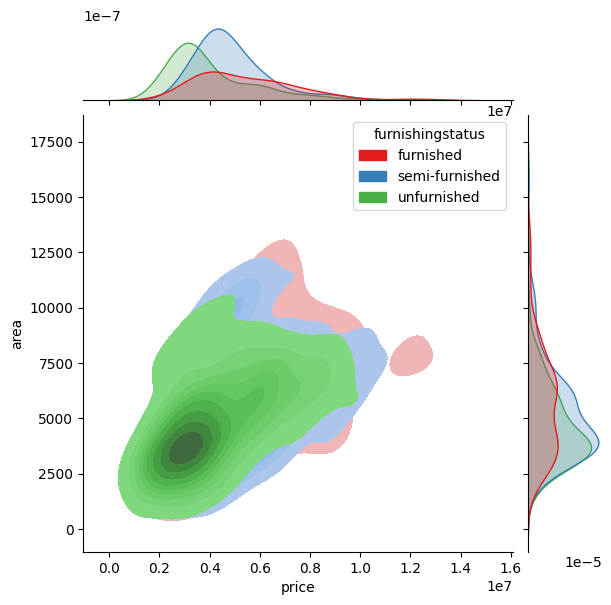

In [41]:
sns.jointplot(
    x=df.price,
    y=df.area,
    kind='kde',
    fill=True,
    color='blue',
    hue=df.furnishingstatus,
    palette='Set1'
)
plt.show()

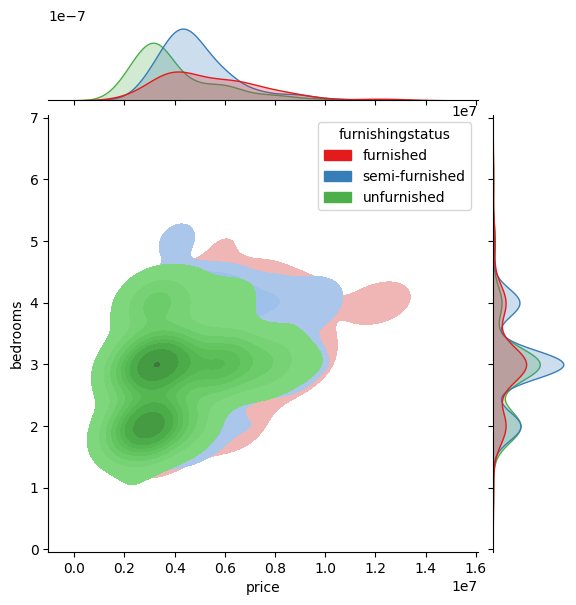

In [43]:
sns.jointplot(
    x=df.price,
    y=df.bedrooms,
    kind='kde',
    fill=True,
    color='blue',
    hue=df.furnishingstatus,
    palette='Set1'
)
plt.show()

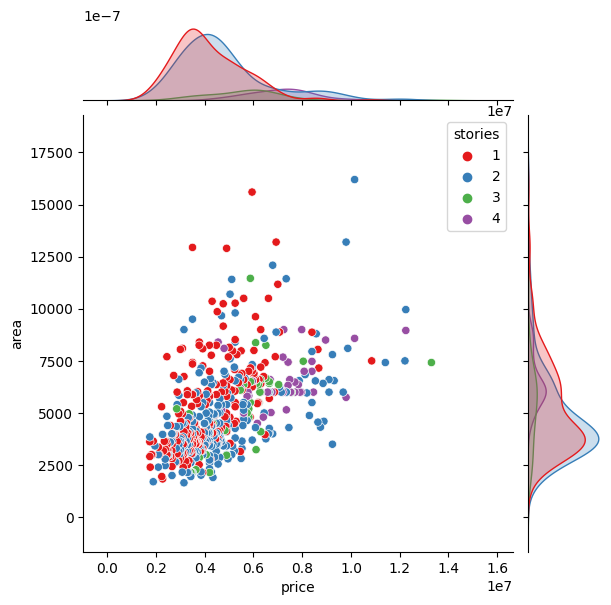

In [50]:
sns.jointplot(
    x=df.price,
    y=df.area,
    color='blue',
    hue=df.stories,
    palette='Set1'
)
plt.show()

In [65]:
px.scatter(x=df.price, y=df.area, color = df.stories, color_continuous_scale='thermal')

In [78]:
df.groupby('prefarea')[['price','area','bedrooms','bathrooms','parking']].mean().reset_index(drop=True)

,price,area,bedrooms,bathrooms,parking
0,4425298.777,4868.518,2.933,1.269,0.650
1,5879045.703,6069.320,3.070,1.344,0.836


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



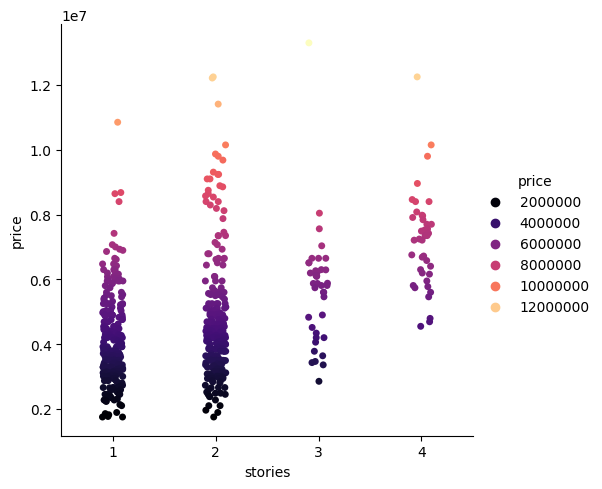

In [89]:
sns.catplot(data = df, x='stories', y='price', hue='price', palette='magma')
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



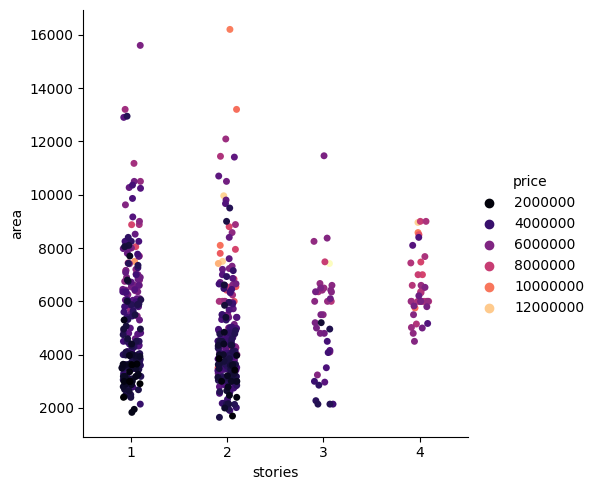

In [93]:
sns.catplot(data = df, x='stories', y='area', hue='price', palette='magma')
plt.show()

In [113]:
df.groupby('bedrooms')[df.select_dtypes('number').columns.tolist()].mean().reset_index(drop=True).sort_values(by='price', ascending = False)

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
4,5819800.000,6291.500,5.000,1.800,2.000,0.200,0.600,0.200,0.300,0.600,0.100
3,5729757.895,5582.063,4.000,1.621,2.305,0.221,0.358,0.042,0.421,0.916,0.242
2,4954598.133,5226.620,3.000,1.267,1.933,0.193,0.390,0.047,0.357,0.723,0.293
5,4791500.000,3950.000,6.000,1.500,2.000,0.000,0.000,0.000,0.000,0.500,0.000
1,3632022.059,4636.235,2.000,1.059,1.169,0.118,0.250,0.037,0.162,0.493,0.118
0,2712500.000,3710.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
